In [1]:
import os
import math
import time
import torch
import torch.nn as nn
import numpy as np
import utils
import random
from tqdm import tqdm
from dataloader.nusc_loader1 import NuScenesLoader1
import valid_loader
from datetime import datetime

In [2]:
# set dataloader
from valid_loader import validation
# # Import model
from model import rvmde
model = rvmde.RVMDE(input_size=(350,800), pretrained=True) 

In [3]:
data=torch.load('./paper_weights_rvmde.pth')
model.load_state_dict(data)
model=model.cuda()

In [4]:
val_set = NuScenesLoader1(data_root=valid_loader.DATA_ROOT)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1, shuffle=False, num_workers=2)

read list from ./list/rain_scene.txt
13
Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 23.683 seconds.
Reverse indexing ...
Done reverse indexing in 5.8 seconds.
mode: val with 526 samples


  0%|                                                                                                                                                                                                                                                            | 0/3418 [00:00<?, ?it/s]/home/mlv/miniconda3/envs/nuscenes/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
  6%|█████████                                                                                                                                                   | 199/3418 [00:11<02:48, 19.06it/s, ORD_LOSS=4.34||DENSE||RMSE=6.62,delta=0.90/0.97|||SPAR

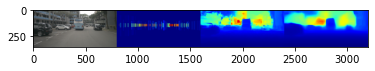

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 3417/3418 [03:00<00:00, 19.64it/s, ORD_LOSS=3.72||DENSE||RMSE=2.56,delta=0.95/0.99|||SPARSE||RMSE=1.92,delta=0.96/1.00|]


**** EVALUATE WITH SPARSE DEPTH ****

**** CAP=80 ****
RMSE=5.060
RMSE_log=0.179
AbsRel=0.108
SqRel=0.982
SILog=17.601
Delta1=0.896
Delta2=0.961
Delta3=0.983
iRMSE=12.890
iMAE=7.889
t_GPU=0.044



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3418/3418 [03:20<00:00, 19.64it/s, ORD_LOSS=3.72||DENSE||RMSE=2.56,delta=0.95/0.99|||SPARSE||RMSE=1.92,delta=0.96/1.00|]

In [6]:
#Evaluation on Complete Test Set (Including Clear Day, Rain, Night)
validation(val_loader, model)

In [ ]:
#For Individual Evalution Set path of Clear Day /Rain / Night in nusc_loader.py file

  0%|                                                                                                                                                                                                                                                            | 0/2490 [00:00<?, ?it/s]/home/mlv/miniconda3/envs/nuscenes/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
  4%|██████▏                                                                                                                                                      | 99/2490 [00:05<02:00, 19.86it/s, ORD_LOSS=9.84||DENSE||RMSE=8.38,delta=0.75/0.92|||SPAR

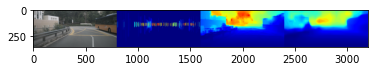

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2489/2490 [02:06<00:00, 20.34it/s, ORD_LOSS=3.43||DENSE||RMSE=3.88,delta=0.93/0.99|||SPARSE||RMSE=2.90,delta=0.97/0.99|]


**** EVALUATE WITH SPARSE DEPTH ****

**** CAP=80 ****
RMSE=4.832
RMSE_log=0.170
AbsRel=0.104
SqRel=0.927
SILog=16.737
Delta1=0.907
Delta2=0.966
Delta3=0.984
iRMSE=12.281
iMAE=7.506
t_GPU=0.043



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2490/2490 [02:20<00:00, 20.34it/s, ORD_LOSS=3.43||DENSE||RMSE=3.88,delta=0.93/0.99|||SPARSE||RMSE=2.90,delta=0.97/0.99|]

In [5]:
# Evalution on Day Clear
validation(val_loader, model)

  0%|                                                                                                                                                                                                                                                             | 0/402 [00:00<?, ?it/s]/home/mlv/miniconda3/envs/nuscenes/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
 25%|██████████████████████████████████████▉                                                                                                                       | 99/402 [00:05<00:15, 19.67it/s, ORD_LOSS=5.58||DENSE||RMSE=7.34,delta=0.85/0.96|||SPAR

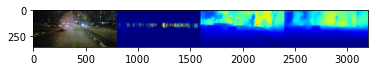

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 401/402 [00:21<00:00, 20.02it/s, ORD_LOSS=4.19||DENSE||RMSE=3.29,delta=0.86/0.97|||SPARSE||RMSE=3.86,delta=0.86/0.96|]


**** EVALUATE WITH SPARSE DEPTH ****

**** CAP=80 ****
RMSE=6.575
RMSE_log=0.238
AbsRel=0.148
SqRel=1.497
SILog=23.270
Delta1=0.808
Delta2=0.927
Delta3=0.970
iRMSE=16.265
iMAE=10.197
t_GPU=0.045



In [5]:
# Evalution on Night Scenes
validation(val_loader, model)

  0%|                                                                                                                                                                                                                                                             | 0/526 [00:00<?, ?it/s]/home/mlv/miniconda3/envs/nuscenes/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
 57%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 298/526 [00:15<00:11, 20.23it/s, ORD_LOSS=4.83||DENSE||RMSE=5.54,delta=0.90/0.97|||SPAR

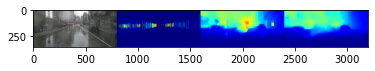

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 525/526 [00:27<00:00, 20.15it/s, ORD_LOSS=3.72||DENSE||RMSE=2.56,delta=0.95/0.99|||SPARSE||RMSE=1.92,delta=0.96/1.00|]


**** EVALUATE WITH SPARSE DEPTH ****

**** CAP=80 ****
RMSE=4.983
RMSE_log=0.177
AbsRel=0.099
SqRel=0.847
SILog=17.358
Delta1=0.912
Delta2=0.966
Delta3=0.983
iRMSE=13.192
iMAE=7.937
t_GPU=0.043



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 526/526 [00:39<00:00, 20.15it/s, ORD_LOSS=3.72||DENSE||RMSE=2.56,delta=0.95/0.99|||SPARSE||RMSE=1.92,delta=0.96/1.00|]

In [5]:
# Evalution on Rain Scenes
validation(val_loader, model)